In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("data/thaiglobal_logistics_data.csv",parse_dates=['date'])

In [5]:
df.head()

,shipment_id,date,origin,destination,distance_km,weight_kg,vehicle_type,vehicle_age_years,driver_id,customer_id,...,delivery_status,delay_hours,transport_cost,revenue,customer_satisfaction,fuel_consumption_liters,maintenance_cost,month,estimated_delivery_days,actual_delivery_days
0,1,2022-04-13,Pattaya,Tokyo,1737.89,214.26,Ship,3.4,211,7684,...,On Time,0.00,1983.64,2748.14,4.84,217.60,1583.21,4,3.7,3.700000
1,2,2023-03-12,Bangkok,London,8206.58,359.15,Airplane,9.5,485,9206,...,Delayed,16.69,9021.03,12532.73,3.10,912.08,4452.07,3,17.3,17.995417
2,3,2022-09-28,Pattaya,London,1438.34,502.28,Ship,8.2,55,728,...,Delayed,21.92,2855.15,3750.48,2.08,188.80,2198.47,9,3.6,4.513333
3,4,2022-04-17,Phuket,Tokyo,4271.25,100.63,Truck,7.3,455,7846,...,On Time,0.00,3714.92,4572.87,4.80,514.23,2301.54,4,8.2,8.200000
4,5,2022-03-13,Pattaya,Sydney,1367.44,326.90,Van,2.4,345,3030,...,On Time,0.00,1535.69,1973.51,4.57,106.65,851.56,3,3.0,3.000000


In [7]:
df.shape

(500000, 21)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   shipment_id              500000 non-null  int64         
 1   date                     500000 non-null  datetime64[ns]
 2   origin                   500000 non-null  object        
 3   destination              500000 non-null  object        
 4   distance_km              500000 non-null  float64       
 5   weight_kg                500000 non-null  float64       
 6   vehicle_type             500000 non-null  object        
 7   vehicle_age_years        500000 non-null  float64       
 8   driver_id                500000 non-null  int64         
 9   customer_id              500000 non-null  int64         
 10  product_type             500000 non-null  object        
 11  delivery_status          500000 non-null  object        
 12  delay_hours     

In [53]:
df.select_dtypes(include='number').columns

Index(['shipment_id', 'distance_km', 'weight_kg', 'vehicle_age_years',
       'driver_id', 'customer_id', 'delay_hours', 'transport_cost', 'revenue',
       'customer_satisfaction', 'fuel_consumption_liters', 'maintenance_cost',
       'month', 'estimated_delivery_days', 'actual_delivery_days'],
      dtype='object')

<Axes: >

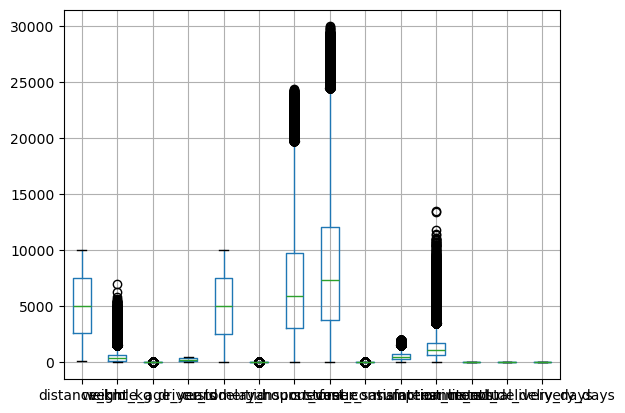

In [59]:
df[['distance_km', 'weight_kg', 'vehicle_age_years',
       'driver_id', 'customer_id', 'delay_hours', 'transport_cost', 'revenue',
       'customer_satisfaction', 'fuel_consumption_liters', 'maintenance_cost',
       'month', 'estimated_delivery_days', 'actual_delivery_days']].boxplot()

<Axes: >

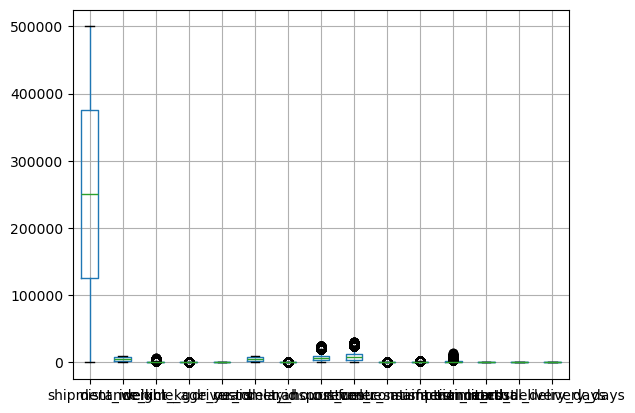

In [15]:
df.boxplot()

In [36]:
df.columns

Index(['shipment_id', 'date', 'origin', 'destination', 'distance_km',
       'weight_kg', 'vehicle_type', 'vehicle_age_years', 'driver_id',
       'customer_id', 'product_type', 'delivery_status', 'delay_hours',
       'transport_cost', 'revenue', 'customer_satisfaction',
       'fuel_consumption_liters', 'maintenance_cost', 'month',
       'estimated_delivery_days', 'actual_delivery_days'],
      dtype='object')

In [38]:
df['delivery_status'].value_counts()

delivery_status
On Time         399895
Delayed          75120
Very Delayed     24985
Name: count, dtype: int64

In [73]:
mask_ontime = df['delivery_status'] == 'On Time'

In [75]:
a = df[['origin','revenue']].copy()

In [77]:
a['on time'] = mask_ontime

In [81]:
m_ontime = df['delivery_status'] == 'On Time'
m_revenueQ75 = df['revenue']> df['revenue'].quantile(.75)

In [85]:
a = df[m_ontime & m_revenueQ75]
a.shape

(99843, 21)

In [87]:
a.head()

,shipment_id,date,origin,destination,distance_km,weight_kg,vehicle_type,vehicle_age_years,driver_id,customer_id,...,delivery_status,delay_hours,transport_cost,revenue,customer_satisfaction,fuel_consumption_liters,maintenance_cost,month,estimated_delivery_days,actual_delivery_days
15,16,2022-04-10,Phuket,London,9487.34,258.89,Truck,2.0,110,1310,...,On Time,0.0,10453.710,12742.53,4.40,958.86,1087.47,4,18.2,18.2
18,19,2023-10-24,Khon Kaen,Dubai,5731.44,9.80,Van,8.1,295,3555,...,On Time,0.0,10703.740,15543.55,4.86,991.94,2775.04,10,12.0,12.0
19,20,2022-11-05,Bangkok,Tokyo,6876.69,137.09,Truck,3.6,214,5247,...,On Time,0.0,13235.208,15073.26,4.07,939.61,1572.37,11,14.0,14.0
20,21,2022-12-10,Bangkok,London,6604.09,279.69,Truck,2.4,190,8986,...,On Time,0.0,10989.048,13292.65,4.47,688.52,616.82,12,13.7,13.7
22,23,2023-02-18,Phuket,Tokyo,6353.31,235.68,Airplane,8.7,61,728,...,On Time,0.0,11857.520,16106.46,4.08,488.93,1791.06,2,12.2,12.2


In [89]:
a.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99843 entries, 15 to 499984
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   shipment_id              99843 non-null  int64         
 1   date                     99843 non-null  datetime64[ns]
 2   origin                   99843 non-null  object        
 3   destination              99843 non-null  object        
 4   distance_km              99843 non-null  float64       
 5   weight_kg                99843 non-null  float64       
 6   vehicle_type             99843 non-null  object        
 7   vehicle_age_years        99843 non-null  float64       
 8   driver_id                99843 non-null  int64         
 9   customer_id              99843 non-null  int64         
 10  product_type             99843 non-null  object        
 11  delivery_status          99843 non-null  object        
 12  delay_hours              99843 non-

In [91]:
df['vehicle_type'].value_counts()

vehicle_type
Truck       125109
Van         125093
Ship        125066
Airplane    124732
Name: count, dtype: int64

In [93]:
df[df['vehicle_type'] == 'Truck']['distance_km'].mean()

5056.012452181698

In [97]:
# dict comprehension

avg_distance_vehicle = {vtype: df[df['vehicle_type'] == 'Truck']['distance_km'].mean()
                        for vtype in df['vehicle_type'].unique()}
print(avg_distance_vehicle)

{'Ship': 5056.012452181698, 'Airplane': 5056.012452181698, 'Truck': 5056.012452181698, 'Van': 5056.012452181698}


In [107]:
route_summary = dict()

for origin in df['origin'].unique():
    key = '{0} - {1}'.format(origin,destination)
    summary = dict()
    summary('avg_cost') = df[df['origin']==origin & df['destination'] == destination].['transport_cost'].mean()
    summary('avg_revenue') = df[df['origin']==origin & df['destination'] == destination].['revenue'].mean()
    route_summary[key] =summary


print(json.dumps(route_summary,indent=2))

SyntaxError: cannot assign to function call here. Maybe you meant '==' instead of '='? (3677826952.py, line 6)

In [113]:
# df['destination'].unique()
set_destination =  set(df['destination'])
set_destination

{'Dubai', 'London', 'New York', 'Singapore', 'Sydney', 'Tokyo'}

In [115]:
if 'Chula' in set_destination:
    print('found')
else:
    print('not found')

not found


In [127]:
print(df['destination'].unique())

['Tokyo' 'London' 'Sydney' 'New York' 'Singapore' 'Dubai']


In [129]:
import seaborn as sns

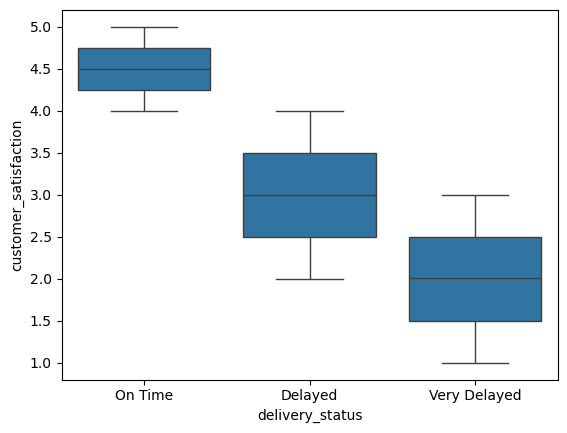

In [137]:
sns.boxplot(x='delivery_status',y='customer_satisfaction', data=df);

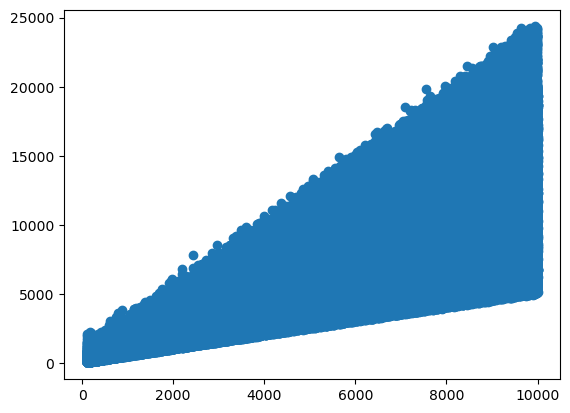

In [140]:
plt.scatter(df['distance_km'],df['transport_cost']);

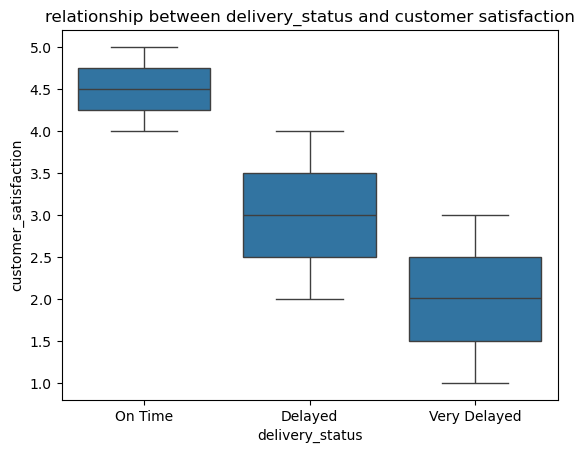

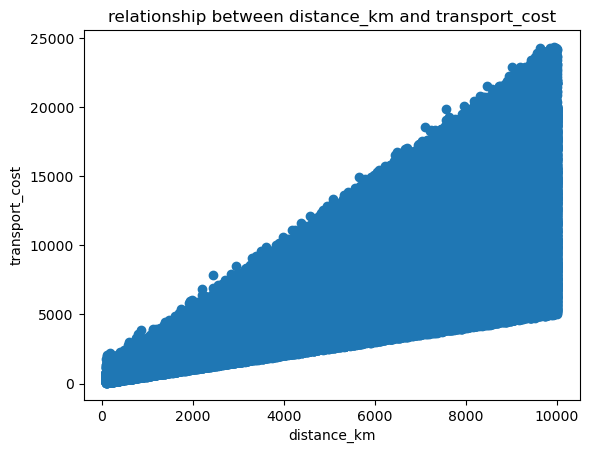

In [155]:
sns.boxplot(x='delivery_status',y='customer_satisfaction', data=df)
plt.title('relationship between delivery_status and customer satisfaction')
plt.show()
plt.scatter(df['distance_km'],df['transport_cost'])
plt.title('relationship between distance_km and transport_cost')
plt.xlabel('distance_km')
plt.ylabel('transport_cost')
plt.show();

In [159]:
def category_distance(d):
    if d < 1000:
        return 'short'
    elif d < 5000:
        return 'medium'
    else:
        return 'long'

df['distance_category'] = df['distance_km'].apply(category_distance)
print(df[['distance_km','distance_category']].head(5))
print(df[['distance_km','distance_category']].sample(5))

   distance_km distance_category
0      1737.89            medium
1      8206.58              long
2      1438.34            medium
3      4271.25            medium
4      1367.44            medium
        distance_km distance_category
103006      7371.98              long
93985       9138.82              long
419096      8074.38              long
476534      5399.78              long
388335      8469.28              long


In [169]:
df['profit'] = df.apply(lambda row: (row['revenue']-row['transport_cost']),axis=1)
df[['revenue','transport_cost','profit']].head()

,revenue,transport_cost,profit
0,2748.14,1983.64,764.50
1,12532.73,9021.03,3511.70
2,3750.48,2855.15,895.33
3,4572.87,3714.92,857.95
4,1973.51,1535.69,437.82
